In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

###load tweet data as df
df=pd.read_csv('C:/research/siads591/Bitcoin_tweets.csv')
df.head()

C:\Users\sunfe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

   user_followers user_friends user_favourites user_verified  \
0          8534.0         7605            4838         False   
1          6769.0         1532           25483         False   
2           128.0          332             924         False   
3           625.0          129              14         False   
4          1249.0         1472           10482         False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  
0                                ['bitcoin']      Twitter Web App      False  
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False  
2                                        NaN      Twitter Web App      False  
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False  
4                                    ['BTC']      Twitter Web App      False

In [2]:
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [3]:
df.shape

(2573255, 13)

# Analysis 1

In [4]:
##check the unique locations number in dataset
location=df.groupby(['user_location']).size().reset_index(name='counts')
len(location)

68738

In [5]:
location=df.groupby(['user_location']).size().reset_index(name='counts')
location=location.sort_values('counts',ascending=False)
location=location[:30]
import altair as alt
sort=location['user_location'].tolist()
alt.Chart(location).mark_bar().encode(
    x=alt.X('user_location:N',title=None,sort=sort,axis=alt.Axis(labelAngle=30)),
    y='counts:Q',
).properties(width=500,height=180)

alt.Chart(...)

In [6]:
##check the unique locations number in dataset
user=df.groupby(['user_name']).size().reset_index(name='counts')
len(user)

414546

In [7]:
user=df.groupby(['user_name']).size().reset_index(name='counts')
user=user.sort_values('counts',ascending=False)
user=user[:30]
import altair as alt
sort=user['user_name'].tolist()
alt.Chart(user).mark_bar().encode(
    x=alt.X('user_name:N',title=None,sort=sort,axis=alt.Axis(labelAngle=30)),
    y='counts:Q',
).properties(width=600,height=180)

alt.Chart(...)

In [8]:
follower=df.groupby(['user_name'],as_index=False).agg({'user_followers': 'max'})
follower=follower.sort_values('user_followers',ascending=False)
follower=follower[:30]
import altair as alt
sort=follower['user_name'].tolist()
alt.Chart(follower).mark_bar().encode(
    x=alt.X('user_name:N',title=None,sort=sort,axis=alt.Axis(labelAngle=30)),
    y='user_followers:Q',
).properties(width=500,height=180)



alt.Chart(...)

In [9]:

verify=df.groupby(['user_name','user_verified']).size().reset_index(name='counts')
verify['user_verified']=verify['user_verified'].astype(str)
verify['user_verified']=verify['user_verified'].str.strip()
verify=verify.groupby(['user_verified']).size().reset_index(name='counts')
verify=verify.sort_values('counts',ascending=False)
verify

user_verified  counts
22                                              False  506357
24                                               True    3850
0                           #btc to the moon 🚀🚀 46059       1
14  DocumentingBTC: Buying a car with #bitcoin in ...       1
25                      saylor: #Bitcoin is a Ladder.       1
23  Official ESHOP Airdrop. If You Missed Meme Tok...       1
21  DocumentingBTC: You're never "late" to #bitcoi...       1
20  DocumentingBTC: Ukraine legalizes #bitcoin 🇺🇦\...       1
19  DocumentingBTC: The #bitcoin subreddit, r/Bitc...       1
18  DocumentingBTC: Put that daylight savings into...       1
17  DocumentingBTC: In 18 days, the 19,000,000th #...       1
16  DocumentingBTC: Galaxy Digital Founder &amp; C...       1
15  DocumentingBTC: Early Google executive and CEO...       1
13  DocumentingBTC: 7.9 billion people, only 21 mi...       1
1                           #btc to the moon 🚀🚀 77774       1
12  DocumentingBTC: #bitcoin at $30: "Am I too lat...       1
11  DocumentingBTC: #Bitcoin miners continue upgra...       1
10  DocumentingBTC: #Bitcoin "grew faster last yea...       1
9   DocumentingBTC: "I would take #bitcoin over go...       1
8   @pythonwealth Good Project 🎉🎉🎉🎉\n\n@nurull_pad...       1
7   @pufferswap Nice project\n\n@karnoto_hendrik \...       1
6   @krakenfx  #ETH #BTC  If you want to become po...       1
5          @iftikharpost the world is flat #bitcoin 💪       1
4   @bloodgoodBTC5\n\n#Bitcoin   \n\nShort term tr...       1
3   @airdropinspect Good and special project\n@anc...       1
2   @DogCakeFinance @DogCakeFinance Great project\...       1
26  🤯Mind-blowing 99.7% of all Bitcoin holders are...       1

# Analysis 2

# daily data merge

In [10]:
df2=pd.read_csv('C:/research/siads591/Binance_BTCUSDT_d.csv',header = 1)
def split(item):
    a=item.split(' ')[0]
    return a

df2['day']=df2['date'].apply(lambda x: split(x))
df2['day']=pd.to_datetime(df2['day'])
df2['daily_move']=(df2['close']/df2['open'])-1
df2['daily_volatility']=(df2['high']/df2['low'])-1
df2=df2.sort_values('day',ascending=True)
df2 = df2[df2['tradecount'].notna()]

df2.head(50)


unix             date    symbol      open      high       low  \
1574  1.510000e+12  2017/12/18 0:00  BTC/USDT  18860.04  19300.00  17029.98   
1573  1.510000e+12  2017/12/19 0:00  BTC/USDT  18856.25  18950.00  16300.00   
1572  1.510000e+12  2017/12/20 0:00  BTC/USDT  17295.20  17720.35  14777.66   
1571  1.510000e+12  2017/12/21 0:00  BTC/USDT  16480.52  17309.50  14022.00   
1570  1.510000e+12  2017/12/22 0:00  BTC/USDT  15514.03  15699.34  10961.00   
1569  1.510000e+12  2017/12/23 0:00  BTC/USDT  13326.61  14950.00  12978.18   
1568  1.510000e+12  2017/12/24 0:00  BTC/USDT  13300.00  13819.99  11640.00   
1567  1.510000e+12  2017/12/25 0:00  BTC/USDT  13500.00  14300.00  12708.00   
1566  1.510000e+12  2017/12/26 0:00  BTC/USDT  13699.34  16050.00  13533.00   
1565  1.510000e+12  2017/12/27 0:00  BTC/USDT  15709.98  16498.05  14200.15   
1564  1.510000e+12  2017/12/28 0:00  BTC/USDT  15459.97  15539.99  13150.00   
1563  1.510000e+12  2017/12/29 0:00  BTC/USDT  14199.14  14981.00  13850.00   
1562  1.510000e+12  2017/12/30 0:00  BTC/USDT  14378.99  14398.85  11750.00   
1561  1.510000e+12  2017/12/31 0:00  BTC/USDT  12345.10  14050.11  12149.98   
1560  1.510000e+12    2018/1/1 0:00  BTC/USDT  13715.65  13818.55  12750.00   
1559  1.510000e+12    2018/1/2 0:00  BTC/USDT  13382.16  15473.49  12890.02   
1558  1.510000e+12    2018/1/3 0:00  BTC/USDT  14690.00  15307.56  14150.00   
1557  1.520000e+12    2018/1/4 0:00  BTC/USDT  14919.51  15280.00  13918.04   
1556  1.520000e+12    2018/1/5 0:00  BTC/USDT  15059.56  17176.24  14600.00   
1555  1.520000e+12    2018/1/6 0:00  BTC/USDT  16960.39  17143.13  16011.21   
1554  1.520000e+12    2018/1/7 0:00  BTC/USDT  17069.79  17099.96  15610.00   
1553  1.520000e+12    2018/1/8 0:00  BTC/USDT  16218.85  16322.30  12812.00   
1552  1.520000e+12    2018/1/9 0:00  BTC/USDT  14902.54  15500.00  14011.05   
1551  1.520000e+12   2018/1/10 0:00  BTC/USDT  14401.00  14955.66  13131.31   
1550  1.520000e+12   2018/1/11 0:00  BTC/USDT  14940.00  14968.68  11400.00   
1549  1.520000e+12   2018/1/12 0:00  BTC/USDT  13238.76  14109.78  12500.00   
1548  1.520000e+12   2018/1/13 0:00  BTC/USDT  13749.95  14580.00  13706.15   
1547  1.520000e+12   2018/1/14 0:00  BTC/USDT  14210.00  14339.50  12569.20   
1546  1.520000e+12   2018/1/15 0:00  BTC/USDT  13477.98  14249.99  13147.79   
1545  1.520000e+12   2018/1/16 0:00  BTC/USDT  13500.00  13542.93   9035.00   
1544  1.520000e+12   2018/1/17 0:00  BTC/USDT  10899.99  11680.99   9037.94   
1543  1.520000e+12   2018/1/18 0:00  BTC/USDT  10972.59  11878.82  10435.33   
1542  1.520000e+12   2018/1/19 0:00  BTC/USDT  10960.00  11795.00  10360.00   
1541  1.520000e+12   2018/1/20 0:00  BTC/USDT  11474.98  13099.00  11412.45   
1540  1.520000e+12   2018/1/21 0:00  BTC/USDT  12799.80  12799.80  10965.00   
1539  1.520000e+12   2018/1/22 0:00  BTC/USDT  11530.00  11926.35   9900.24   
1538  1.520000e+12   2018/1/23 0:00  BTC/USDT  10760.05  11399.00   9905.00   
1537  1.520000e+12   2018/1/24 0:00  BTC/USDT  10799.14  11570.48  10500.00   
1536  1.520000e+12   2018/1/25 0:00  BTC/USDT  11349.96  11794.05  10950.21   
1535  1.520000e+12   2018/1/26 0:00  BTC/USDT  11184.70  11643.00  10311.15   
1534  1.520000e+12   2018/1/27 0:00  BTC/USDT  11089.00  11650.00  10842.69   
1533  1.520000e+12   2018/1/28 0:00  BTC/USDT  11499.98  12244.00  11408.00   
1532  1.520000e+12   2018/1/29 0:00  BTC/USDT  11879.95  11975.02  11139.55   
1531  1.520000e+12   2018/1/30 0:00  BTC/USDT  11250.11  11308.42   9900.00   
1530  1.520000e+12   2018/1/31 0:00  BTC/USDT  10230.00  10425.85   9700.00   
1529  1.520000e+12    2018/2/1 0:00  BTC/USDT  10285.10  10335.00   8750.99   
1528  1.520000e+12    2018/2/2 0:00  BTC/USDT   9224.52   9250.00   8010.02   
1527  1.520000e+12    2018/2/3 0:00  BTC/USDT   8873.03   9473.01   8229.00   
1526  1.520000e+12    2018/2/4 0:00  BTC/USDT   9199.96   9368.00   7930.00   
1525  1.520000e+12    2018/2/5 0:00  BTC/USDT   8179.99   8382.8

In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
# df2['volume_change'] = df2.tradecount.diff(periods=1)
df2['previous_volume'] = df2.tradecount.shift(periods=1) 
df2['day1_price'] = df2.close.shift(periods=-1) 
df2['day2_price'] = df2.close.shift(periods=-2) 
df2['day3_price'] = df2.close.shift(periods=-3) 
df2['day4_price'] = df2.close.shift(periods=-4) 
df2['day5_price'] = df2.close.shift(periods=-5) 
df2['day7_price'] = df2.close.shift(periods=-7) 
df2['day14_price'] = df2.close.shift(periods=-14) 
df2['day30_price'] = df2.close.shift(periods=-30) 

df2['day1_move'] =(df2['day1_price']/df2['close'])-1
df2['day2_move'] = (df2['day2_price']/df2['close'])-1
df2['day3_move'] = (df2['day3_price']/df2['close'])-1
df2['day4_move'] =(df2['day4_price']/df2['close'])-1
df2['day5_move'] = (df2['day5_price']/df2['close'])-1
df2['day7_move'] = (df2['day7_price']/df2['close'])-1
df2['day14_move'] = (df2['day14_price']/df2['close'])-1
df2['day30_move'] = (df2['day30_price']/df2['close'])-1

df2['day1_move_abs'] =df2['day1_move'].abs()
df2['day2_move_abs'] =df2['day2_move'].abs()
df2['day3_move_abs'] =df2['day3_move'].abs()
df2['day4_move_abs'] =df2['day4_move'].abs()
df2['day5_move_abs'] =df2['day5_move'].abs()
df2['day7_move_abs'] =df2['day7_move'].abs()
df2['day14_move_abs'] =df2['day14_move'].abs()
df2['day30_move_abs'] =df2['day30_move'].abs()


df2.head(20)


unix             date    symbol      open      high       low     close    Volume BTC  Volume USDT  tradecount        day  daily_move  daily_volatility  previous_volume  day1_price  day2_price  day3_price  day4_price  day5_price  day7_price  day14_price  day30_price  day1_move  day2_move  day3_move  day4_move  day5_move  day7_move  day14_move  day30_move  day1_move_abs  day2_move_abs  day3_move_abs  day4_move_abs  day5_move_abs  day7_move_abs  day14_move_abs  day30_move_abs
1574  1.510000e+12  2017/12/18 0:00  BTC/USDT  18860.04  19300.00  17029.98  18856.25  10624.633070  196339245.7     91956.0 2017-12-18   -0.000201          0.133296              NaN    17295.20    16488.98    15492.64    13326.61    13300.00    13699.34     13380.00     10988.79  -0.082787  -0.125543  -0.178382  -0.293252  -0.294664  -0.273485   -0.290421   -0.417234       0.082787       0.125543       0.178382       0.293252       0.294664       0.273485        0.290421        0.417234
1573  1.510000e+12  2017/12/19 0:00  BTC/USDT  18856.25  18950.00  16300.00  17295.20  13210.748220  232790625.9    116569.0 2017-12-19   -0.082787          0.162577          91956.0    16488.98    15492.64    13326.61    13300.00    13500.00    15689.01     14675.11     10961.97  -0.046615  -0.104223  -0.229462  -0.231001  -0.219437  -0.092869   -0.151492   -0.366184       0.046615       0.104223       0.229462       0.231001       0.219437       0.092869        0.151492        0.366184
1572  1.510000e+12  2017/12/20 0:00  BTC/USDT  17295.20  17720.35  14777.66  16488.98  13450.496690  221193892.5    129762.0 2017-12-20   -0.046615          0.199131         116569.0    15492.64    13326.61    13300.00    13500.00    13699.34    15459.99     14919.51     11474.98  -0.060425  -0.191787  -0.193401  -0.181271  -0.169182  -0.062405   -0.095183   -0.304082       0.060425       0.191787       0.193401       0.181271       0.169182       0.062405        0.095183        0.304082
1571  1.510000e+12  2017/12/21 0:00  BTC/USDT  16480.52  17309.50  14022.00  15492.64  20324.217300  320176825.3    117731.0 2017-12-21   -0.059942          0.234453         129762.0    13326.61    13300.00    13500.00    13699.34    15689.01    14182.11     15059.54     12799.94  -0.139810  -0.141528  -0.128618  -0.115752   0.012675  -0.084590   -0.027955   -0.173805       0.139810       0.141528       0.128618       0.115752       0.012675       0.084590        0.027955        0.173805
1570  1.510000e+12  2017/12/22 0:00  BTC/USDT  15514.03  15699.34  10961.00  13326.61  36076.271180  477509934.7    243261.0 2017-12-22   -0.140996          0.432291         117731.0    13300.00    13500.00    13699.34    15689.01    15459.99    14378.90     16960.39     11530.00  -0.001997   0.013011   0.027969   0.177269   0.160084   0.078962    0.272671   -0.134814       0.001997       0.013011       0.027969       0.177269       0.160084       0.078962        0.272671        0.134814
1569  1.510000e+12  2017/12/23 0:00  BTC/USDT  13326.61  14950.00  12978.18  13300.00  13141.538880  184759685.3    135005.0 2017-12-23   -0.001997          0.151933         243261.0    13500.00    13699.34    15689.01    15459.99    14182.11    12440.01     17069.79     10760.05   0.015038   0.030026   0.179625   0.162405   0.066324  -0.064661    0.283443   -0.190974       0.015038       0.030026       0.179625       0.162405       0.066324       0.064661        0.283443        0.190974
1568  1.510000e+12  2017/12/24 0:00  BTC/USDT  13300.00  13819.99  11640.00  13500.00  28557.534990  365709589.6    173557.0 2017-12-24    0.015038          0.187284         135005.0    13699.34    15689.01    15459.99    14182.11    14378.90    13716.36     16150.03     10799.18   0.014766   0.162149   0.145184   0.050527   0.065104   0.016027    0.196299   -0.200061       0.014766       0.162149       0.145184       0.050527       0.065104       0.016027        0.196299        0.200061
1567  1.510000e+12  2017/12/25 0:00  BTC/USDT  13500.00  14300.00  127

In [13]:
len(df2['day'].unique())

1575

In [14]:
###transform format of the key "day" in df
df['date']=df['date'].astype(str)
df['day']=df['date'].apply(lambda x: split(x))
filter1=df.groupby(['day']).size().reset_index(name='counts')
filter1=filter1[127:]
filter1=filter1['day'].tolist()


df_filter= df[~df['day'].isin(filter1)]
df_filter['day']=pd.to_datetime(df_filter['day'])



C:\Users\sunfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [15]:
df_filter['day'].unique()

array(['2021-02-10T00:00:00.000000000', '2021-02-09T00:00:00.000000000',
       '2021-02-08T00:00:00.000000000', '2021-02-07T00:00:00.000000000',
       '2021-02-06T00:00:00.000000000', '2021-02-05T00:00:00.000000000',
       '2021-02-15T00:00:00.000000000', '2021-02-14T00:00:00.000000000',
       '2021-02-13T00:00:00.000000000', '2021-02-19T00:00:00.000000000',
       '2021-02-18T00:00:00.000000000', '2021-02-22T00:00:00.000000000',
       '2021-02-28T00:00:00.000000000', '2021-03-12T00:00:00.000000000',
       '2021-03-11T00:00:00.000000000', '2021-04-12T00:00:00.000000000',
       '2021-04-11T00:00:00.000000000', '2021-04-10T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-07T00:00:00.000000000', '2021-04-06T00:00:00.000000000',
       '2021-04-05T00:00:00.000000000', '2021-04-24T00:00:00.000000000',
       '2021-04-23T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-04-21T00:00:00.000000000', '2021-04-20

In [16]:
df_filter_dailycount=df_filter.groupby(['day']).size().reset_index(name='counts')
df_filter_dailycount

day  counts
0   2021-02-05    1694
1   2021-02-06    3278
2   2021-02-07    3030
3   2021-02-08    5647
4   2021-02-09    4350
5   2021-02-10    3526
6   2021-02-13    2285
7   2021-02-14    4009
8   2021-02-15    4651
9   2021-02-18    2254
10  2021-02-19    4521
11  2021-02-22    3564
12  2021-02-28    1634
13  2021-03-11     217
14  2021-03-12    3923
15  2021-04-05    2197
16  2021-04-06    3730
17  2021-04-07    4039
18  2021-04-08    3740
19  2021-04-09    3475
20  2021-04-10    4011
21  2021-04-11    2039
22  2021-04-12    1926
23  2021-04-17     333
24  2021-04-18    4708
25  2021-04-19    4119
26  2021-04-20    4388
27  2021-04-21    4436
28  2021-04-22    5102
29  2021-04-23    5865
30  2021-04-24    3952
31  2021-05-25    2803
32  2021-05-26    4898
33  2021-05-27    4383
34  2021-05-28    5189
35  2021-05-29    4509
36  2021-06-20    8868
37  2021-06-21   41729
38  2021-06-22   45840
39  2021-06-23   29358
40  2021-07-02   17789
41  2021-07-03   25430
42  2021-07-04   23087
43  2021-07-05   25981
44  2021-07-16    1110
45  2021-07-17   15204
46  2021-07-18   26239
47  2021-07-19   28931
48  2021-07-20   30933
49  2021-07-21   38911
50  2021-07-22   30833
51  2021-07-23   43535
52  2021-07-24   32131
53  2021-07-25   11609
54  2021-07-26   27491
55  2021-07-27   13948
56  2021-07-28   15491
57  2021-07-29   19034
58  2021-07-30   38392
59  2021-08-04    1773
60  2021-08-05   12817
61  2021-08-06   15995
62  2021-08-07   13186
63  2021-08-08   33834
64  2021-08-09   53501
65  2021-08-14   13677
66  2021-08-15   30091
67  2021-08-16   32460
68  2021-08-17   35318
69  2021-08-18   38227
70  2021-08-19   34272
71  2021-08-20   39291
72  2021-08-21   10928
73  2021-08-23   10503
74  2021-08-24   26905
75  2021-08-25   47043
76  2021-08-26   39166
77  2021-09-10   23510
78  2021-10-18   23083
79  2021-10-19   63590
80  2021-10-20   33394
81  2021-10-21   42406
82  2021-10-22   54775
83  2021-10-23   39413
84  2021-10-27   21919
85  2021-10-28   37411
86  2021-10-29   35805
87  2021-11-04   25929
88  2021-11-05   35590
89  2021-11-06   45799
90  2021-11-11   19849
91  2021-11-12   39858
92  2021-11-18   36976
93  2021-11-19   54023
94  2021-11-24    6383
95  2021-11-25   37651
96  2021-11-26   57572
97  2021-12-11    6004
98  2021-12-17   20439
99  2021-12-29    3770
100 2021-12-30   25088
101 2022-01-11   11613
102 2022-01-12   42230
103 2022-01-13   42993
104 2022-01-14   30041
105 2022-01-19    3673
106 2022-01-20   22063
107 2022-01-21   35669
108 2022-01-22   71805
109 2022-02-09   25303
110 2022-02-14    5348
111 2022-02-15    8830
112 2022-02-16    3542
113 2022-02-17   18242
114 2022-02-18   18210
115 2022-03-02    8374
116 2022-03-06    8007
117 2022-03-07   23999
118 2022-03-08    5495
119 2022-03-09   15848
120 2022-03-10   33082
121 2022-03-14    3569
122 2022-03-15   31455
123 2022-03-16   43502
124 2022-03-17   23202
125 2022-03-18   20865
126 2022-03-19   16522

# merge daily data

In [17]:
# merge the key by 'day'
dfdaily = pd.merge(df_filter_dailycount, df2,  how='left', left_on=['day'], right_on = ['day'])


In [18]:
dfdaily.columns

Index(['day', 'counts', 'unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USDT', 'tradecount', 'daily_move', 'daily_volatility', 'previous_volume', 'day1_price', 'day2_price', 'day3_price', 'day4_price', 'day5_price', 'day7_price', 'day14_price', 'day30_price', 'day1_move', 'day2_move', 'day3_move', 'day4_move', 'day5_move', 'day7_move', 'day14_move', 'day30_move', 'day1_move_abs', 'day2_move_abs', 'day3_move_abs', 'day4_move_abs', 'day5_move_abs', 'day7_move_abs', 'day14_move_abs', 'day30_move_abs'], dtype='object')

In [19]:
dfdaily['day']=dfdaily['day'].astype(str)
dateindex=dfdaily.index[dfdaily['day'].str.contains( '2021-06-21')].tolist()
dfdaily1=dfdaily.loc[dateindex[-1]+1:]
dfdaily1

day  counts          unix             date    symbol      open      high       low     close    Volume BTC   Volume USDT  tradecount  daily_move  daily_volatility  previous_volume  day1_price  day2_price  day3_price  day4_price  day5_price  day7_price  day14_price  day30_price  day1_move  day2_move  day3_move  day4_move  day5_move  day7_move  day14_move  day30_move  day1_move_abs  day2_move_abs  day3_move_abs  day4_move_abs  day5_move_abs  day7_move_abs  day14_move_abs  day30_move_abs
38   2021-06-22   45840  1.620000e+12   2021/6/22 0:00  BTC/USDT  31614.12  33298.78  28805.00  32509.56  204208.17980  6.406159e+09   3113977.0    0.028324          0.156007        2688993.0    33678.07    34663.09    31584.45    32283.65    34700.34    35911.73     34220.01     32287.83   0.035944   0.066243  -0.028457  -0.006949   0.067389   0.104651    0.052614   -0.006820       0.035944       0.066243       0.028457       0.006949       0.067389       0.104651        0.052614        0.006820
39   2021-06-23   29358  1.620000e+12   2021/6/23 0:00  BTC/USDT  32509.56  34881.00  31683.00  33678.07  126966.10060  4.282250e+09   2026228.0    0.035944          0.100937        3113977.0    34663.09    31584.45    32283.65    34700.34    34494.89    35045.00     33862.12     33634.09   0.029248  -0.062166  -0.041404   0.030354   0.024254   0.040588    0.005465   -0.001306       0.029248       0.062166       0.041404       0.030354       0.024254       0.040588        0.005465        0.001306
40   2021-07-02   17789  1.630000e+12    2021/7/2 0:00  BTC/USDT  33502.33  33977.04  32699.00  33786.55   56172.18138  1.870193e+09   1176457.0    0.008484          0.039085        1240681.0    34669.13    35286.51    33690.14    34220.01    33862.12    33815.81     31383.87     39845.44   0.026122   0.044395  -0.002854   0.012829   0.002237   0.000866   -0.071114    0.179328       0.026122       0.044395       0.002854       0.012829       0.002237       0.000866        0.071114        0.179328
41   2021-07-03   25430  1.630000e+12    2021/7/3 0:00  BTC/USDT  33786.54  34945.61  33316.73  34669.13   43044.57864  1.478423e+09   1078278.0    0.026123          0.048891        1176457.0    35286.51    33690.14    34220.01    33862.12    32875.71    33502.87     31520.07     39147.82   0.017808  -0.028238  -0.012954  -0.023277  -0.051730  -0.033640   -0.090832    0.129184       0.017808       0.028238       0.012954       0.023277       0.051730       0.033640        0.090832        0.129184
42   2021-07-04   23087  1.630000e+12    2021/7/4 0:00  BTC/USDT  34669.12  35967.85  34357.15  35286.51   43703.47579  1.544458e+09   1164970.0    0.017808          0.046881        1078278.0    33690.14    34220.01    33862.12    32875.71    33815.81    34258.99     31778.56     38207.05  -0.045240  -0.030224  -0.040366  -0.068321  -0.041679  -0.029119   -0.099413    0.082766       0.045240       0.030224       0.040366       0.068321       0.041679       0.029119        0.099413        0.082766
43   2021-07-05   25981  1.630000e+12    2021/7/5 0:00  BTC/USDT  35288.13  35293.78  33125.55  33690.14   64123.87425  2.183406e+09   1109367.0   -0.045284          0.065455        1164970.0    34220.01    33862.12    32875.71    33815.81    33502.87    33086.63     30839.65     39723.18   0.015728   0.005105  -0.024174   0.003730  -0.005559  -0.017914   -0.084609    0.179074       0.015728       0.005105       0.024174       0.003730       0.005559       0.017914        0.084609        0.179074
44   2021-07-16    1110  1.630000e+12   2021/7/16 0:00  BTC/USDT  31874.49  32249.18  31020.00  31383.87   48499.86415  1.538343e+09   1067591.0   -0.015392          0.039625        1099367.0    31520.07    31778.56    30839.65    29790.35    32144.51    33634.09     42206.37     46973.82   0.004340   0.012576  -0.017341  -0.050775   0.024237   0.071700    0.344843    0.496750       0.004340       0.012576       0.017341       0.050775       0.024237       0.071700        0.344843        0.496

In [20]:
dfcount_move=dfdaily1[['counts','Volume USDT', 'tradecount','daily_volatility']]

In [21]:
dfdaily['counts'].describe()


count      127.000000
mean     20259.881890
std      16589.581119
min        217.000000
25%       4412.000000
50%      17789.000000
75%      33238.000000
max      71805.000000
Name: counts, dtype: float64

In [22]:
len(dfdaily)
dfcount_move

counts   Volume USDT  tradecount  daily_volatility
38    45840  6.406159e+09   3113977.0          0.156007
39    29358  4.282250e+09   2026228.0          0.100937
40    17789  1.870193e+09   1176457.0          0.039085
41    25430  1.478423e+09   1078278.0          0.048891
42    23087  1.544458e+09   1164970.0          0.046881
43    25981  2.183406e+09   1109367.0          0.065455
44     1110  1.538343e+09   1067591.0          0.039625
45    15204  1.072816e+09    883442.0          0.025401
46    26239  1.140964e+09    760979.0          0.042625
47    28931  1.470563e+09    846029.0          0.049052
48    30933  1.821231e+09   1062139.0          0.060970
49    38911  2.603141e+09   1415058.0          0.114487
50    30833  1.482764e+09   1000742.0          0.027859
51    43535  1.631947e+09   1394786.0          0.054055
52    32131  1.625046e+09   1196914.0          0.032899
53    11609  1.646936e+09   1245775.0          0.045697
54    27491  5.832475e+09   3330102.0          0.151800
55    13948  3.335658e+09   1938478.0          0.086843
56    15491  4.040889e+09   2631048.0          0.054885
57    19034  2.154191e+09   1428738.0          0.036735
58    38392  2.939834e+09   1797012.0          0.104493
59     1773  2.028793e+09   1220555.0          0.065614
60    12817  3.314528e+09   1913281.0          0.107608
61    15995  3.148022e+09   2223356.0          0.088789
62    13186  3.197407e+09   2258213.0          0.053093
63    33834  3.074925e+09   1857112.0          0.047364
64    53501  3.362870e+09   2130595.0          0.085910
65    13677  2.166461e+09   1849556.0          0.047268
66    30091  1.950754e+09   1580122.0          0.041149
67    32460  2.462128e+09   1655378.0          0.052427
68    35318  2.616340e+09   1781303.0          0.062737
69    38227  2.439673e+09   1656723.0          0.040647
70    34272  2.416320e+09   1774382.0          0.070691
71    39291  2.721132e+09   1950404.0          0.059198
72    10928  2.290966e+09   2069725.0          0.031833
73    10503  2.616721e+09   2143309.0          0.030003
74    26905  2.486079e+09   1692896.0          0.047479
75    47043  2.149442e+09   1559186.0          0.045368
76    39166  2.333900e+09   1532753.0          0.067088
77    23510  2.243699e+09   1569941.0          0.065728
78    23083  3.195091e+09   1629184.0          0.047646
79    63590  3.370864e+09   1755708.0          0.051593
80    33394  3.362879e+09   1823286.0          0.055427
81    42406  4.407758e+09   2181665.0          0.074835
82    54775  3.229378e+09   1555280.0          0.062207
83    39413  1.686122e+09    982103.0          0.036693
84    21919  3.688306e+09   1913083.0          0.060276
85    37411  3.677630e+09   1878275.0          0.080924
86    35805  2.706091e+09   1417344.0          0.046617
87    25929  2.218138e+09   1346081.0          0.039707
88    35590  1.943346e+09   1243074.0          0.030874
89    45799  1.556775e+09    965309.0          0.025154
90    19849  2.415537e+09   1327827.0          0.023402
91    39858  2.844287e+09   1479149.0          0.050944
92    36976  3.644824e+09   1960419.0          0.079713
93    54023  2.896190e+09   1560459.0          0.048921
94     6383  2.246374e+09   1432991.0          0.033992
95    37651  2.455659e+09   1604266.0          0.042086
96    57572  3.649354e+09   2138184.0          0.105607
97     6004  1.397525e+09    957390.0          0.058495
98    20439  2.015966e+09   1261780.0          0.055877
99     3770  1.873786e+09   1114074.0          0.044300
100   25088  1.428756e+09    910157.0          0.043573
101   11613  1.574804e+09   1015526.0          0.044369
102   42230  1.470906e+09   1023902.0          0.044099
103   42993  1.515945e+09   1036234.0          0.051730
104   30041  1.392000e+09    946938.0          0.041289
105    3673  1.327478e+09    924528.0          0.034531
106   22063  1.784801e+09   1098761.0          0.072785
107   35669  3.405502e+09   2092561.0          0.159692
108   71805  3.207531e+09   2

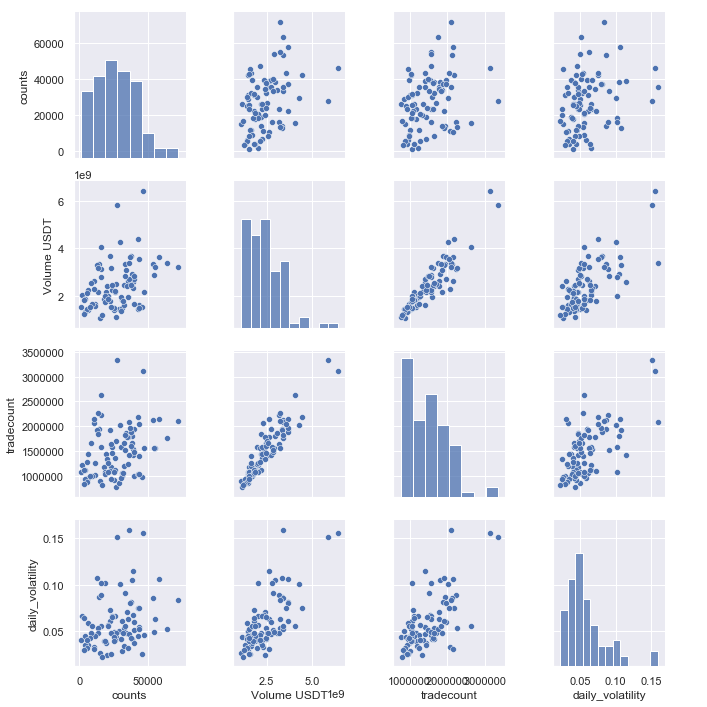

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(10, 10))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(dfcount_move,height=2.5)


In [24]:
# sns.set(rc={'figure.figsize':(5,5)})

# # a=sns.scatterplot(data = dfcount_move, x = "Volume USDT", y = "counts")
# b=sns.scatterplot(data = dfcount_move, x = "daily_volatility", y = "counts")

# b

a=alt.Chart(dfcount_move).mark_point(size=7).encode(
    x=alt.X('daily_volatility:Q'),
    y=alt.Y('counts:Q',title='daily tweets count'),  
).properties(width=150,height=150)

b=alt.Chart(dfcount_move).mark_point(size=7).encode(
    x=alt.X('Volume USDT:Q'),
    y=alt.Y('counts:Q',title=None),  
).properties(width=150,height=150)

a|b

alt.HConcatChart(...)

In [25]:
dfcount_move.corr()

counts  Volume USDT  tradecount  daily_volatility
counts            1.000000     0.372373    0.313589          0.275392
Volume USDT       0.372373     1.000000    0.921960          0.714169
tradecount        0.313589     0.921960    1.000000          0.632237
daily_volatility  0.275392     0.714169    0.632237          1.000000

In [26]:
dfdaily['day1']=dfdaily['day'].astype(str)
dfdaily['day1']=dfdaily['day1'].str[:10]
dfdaily.head()

day  counts          unix           date    symbol      open      high       low     close    Volume BTC   Volume USDT  tradecount  daily_move  daily_volatility  previous_volume  day1_price  day2_price  day3_price  day4_price  day5_price  day7_price  day14_price  day30_price  day1_move  day2_move  day3_move  day4_move  day5_move  day7_move  day14_move  day30_move  day1_move_abs  day2_move_abs  day3_move_abs  day4_move_abs  day5_move_abs  day7_move_abs  day14_move_abs  day30_move_abs        day1
0  2021-02-05    1694  1.610000e+12  2021/2/5 0:00  BTC/USDT  36936.65  38310.12  36570.00  38290.24   66681.33428  2.509278e+09   1853253.0    0.036646          0.047583        2211866.0    39186.94    38795.69    46374.87    46420.42    44807.58    47287.60     55906.00     50971.75   0.023419   0.013200   0.211141   0.212330   0.170209   0.234978    0.460059    0.331194       0.023419       0.013200       0.211141       0.212330       0.170209       0.234978        0.460059        0.331194  2021-02-05
1  2021-02-06    3278  1.610000e+12  2021/2/6 0:00  BTC/USDT  38289.32  40955.51  38215.94  39186.94   98757.31118  3.922095e+09   2291646.0    0.023443          0.071687        1853253.0    38795.69    46374.87    46420.42    44807.58    47969.51    47153.69     55841.19     52375.17  -0.009984   0.183427   0.184589   0.143431   0.224120   0.203301    0.424995    0.336547       0.009984       0.183427       0.184589       0.143431       0.224120       0.203301        0.424995        0.336547  2021-02-06
2  2021-02-07    3030  1.610000e+12  2021/2/7 0:00  BTC/USDT  39181.01  39700.00  37351.00  38795.69   84363.67976  3.256521e+09   1976357.0   -0.009834          0.062890        2291646.0    46374.87    46420.42    44807.58    47969.51    47287.60    48577.79     57408.57     54884.50   0.195361   0.196535   0.154963   0.236465   0.218888   0.252144    0.479767    0.414706       0.195361       0.196535       0.154963       0.236465       0.218888       0.252144        0.479767        0.414706  2021-02-07
3  2021-02-08    5647  1.610000e+12  2021/2/8 0:00  BTC/USDT  38795.69  46794.45  37988.89  46374.87  138597.53690  5.881537e+09   3230961.0    0.195361          0.231793        1976357.0    46420.42    44807.58    47969.51    47287.60    47153.69    47911.10     54087.67     55851.59   0.000982  -0.033796   0.034386   0.019682   0.016794   0.033126    0.166314    0.204350       0.000982       0.033796       0.034386       0.019682       0.016794       0.033126        0.166314        0.204350  2021-02-08
4  2021-02-09    4350  1.610000e+12  2021/2/9 0:00  BTC/USDT  46374.86  48142.19  44961.09  46420.42  115499.86170  5.386255e+09   3119034.0    0.000982          0.070752        3230961.0    44807.58    47969.51    47287.60    47153.69    48577.79    49133.45     48891.00     57773.16  -0.034744   0.033371   0.018681   0.015796   0.046475   0.058445    0.053222    0.244563       0.034744       0.033371       0.018681       0.015796       0.046475       0.058445        0.053222        0.244563  2021-02-09

In [27]:
dfdaily.columns

Index(['day', 'counts', 'unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USDT', 'tradecount', 'daily_move', 'daily_volatility', 'previous_volume', 'day1_price', 'day2_price', 'day3_price', 'day4_price', 'day5_price', 'day7_price', 'day14_price', 'day30_price', 'day1_move', 'day2_move', 'day3_move', 'day4_move', 'day5_move', 'day7_move', 'day14_move', 'day30_move', 'day1_move_abs', 'day2_move_abs', 'day3_move_abs', 'day4_move_abs', 'day5_move_abs', 'day7_move_abs', 'day14_move_abs', 'day30_move_abs', 'day1'], dtype='object')

In [28]:

dailycount=alt.Chart(dfdaily).mark_bar().encode(
    x=alt.X('day1:N',title=None,axis=alt.Axis(labelAngle=90)),
    y=alt.Y('counts:Q',title='daily tweets count'),  
).properties(width=1200,height=180)

price=alt.Chart(dfdaily).mark_line(color='orange').encode(
    x=alt.X('day1:N',title=None,axis=alt.Axis(labelAngle=70)),
#     y='close:Q',
    y=alt.Y('close:Q',axis=alt.Axis(title='daily bitcoin price',titleColor='orange'),scale=alt.Scale(domain=[20000, 70000]))
).properties(width=1200,height=180)

alt.layer(dailycount, price).resolve_scale(y='independent')

alt.LayerChart(...)

In [ ]:
df_filter.dtypes

# merge hourly data

In [30]:
df_filter['hour']=pd.to_datetime(df_filter['date'])
df_filter['hour']=df_filter['hour'].dt.floor('H')
df_filter

C:\Users\sunfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sunfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


user_name                    user_location                                   user_description         user_created  user_followers user_friends user_favourites user_verified                 date                                               text                                           hashtags                          source is_retweet        day                hour
0                                            DeSota Wilson                      Atlanta, GA  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09          8534.0         7605            4838         False  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...                                        ['bitcoin']                 Twitter Web App      False 2021-02-10 2021-02-10 23:00:00
1                                                 CryptoND                              NaN  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10          6769.0         1532           25483         False  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...          ['Thursday', 'Btc', 'wallet', 'security']             Twitter for Android      False 2021-02-10 2021-02-10 23:00:00
2                                                Tdlmatias                  London, England  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37           128.0          332             924         False  2021-02-10 23:54:48  Guys evening, I have read this article about B...                                                NaN                 Twitter Web App      False 2021-02-10 2021-02-10 23:00:00
3                                     Crypto is the future                              NaN  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12           625.0          129              14         False  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...                 ['Bitcoin', 'FX', 'BTC', 'crypto']                         dlvr.it      False 2021-02-10 2021-02-10 23:00:00
4                 Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader                           Europa  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55          1249.0         1472           10482         False  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...                                            ['BTC']                 Twitter Web App      False 2021-02-10 2021-02-10 23:00:00
5                                      ZerrBenz™ ⚔ ✪ 20732                    Bkk, Thailand  I'm a cat slave 🐱 Interested in Blockchain · T...  2010-01-12 07:00:04           742.0          716            2444         False  2021-02-10 23:53:30  💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...                  ['Crypto', 'Binance', 'Cashback']                 Twitter Web App      False 2021-02-10 2021-02-10 23:00:00
6                                              Bitcoin-Bot                     Florida, USA  Bot to generate Bitcoin picture as combination...  2019-12-23 16:49:16           131.0           84            5728         False  2021-02-10 23:53:17  &lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...                       ['Bitcoin', 'Crypto', 'BTC']                       BTC_p_bot      False 2021-02-10 2021-02-10 23:00:00
7                                   Cryptocurrencies / EUR                              NaN  Stay updated on the main cryptocurrencies of t...  2018-08-03 21:30:08          4052.0            1               9         False  2021-02-10 23:52:42  🔄 Prices update in $EUR (1 hour):\n\n$BTC   - ...                                                NaN  Cryptocurrencies prices to EUR      False 2021-02-10 2021-02-10 23:00:00
8                                                  Mikcoin                              NaN  Technical Analyst | Trader\n\nNo certainty, on...  2020-11-26 23:45:46           104.0           41             238         False  2021-02-10 23:52:25  #BTC #Bitcoin #Ethereum 

In [31]:
hourdata=df_filter.groupby(['hour']).size().reset_index(name='counts')
hourdata['previous_hour'] = hourdata.hour.shift(periods=1) 
hourdata['previous_counts'] = hourdata.counts.shift(periods=1) 
hourdata['tweets_change'] =(hourdata['counts'] /hourdata['previous_counts'])-1

hourdata['date']=hourdata['hour'].astype(str)
dateindex=hourdata.index[hourdata['date'].str.contains( '2021-06-21')].tolist()
hourdata=hourdata.loc[dateindex[-1]+1:]
hourdata['diff']=(hourdata['hour']-hourdata['previous_hour']).apply(lambda x: (x.seconds)/3600)
hourdata=hourdata[hourdata['diff']==1]
hourdata.reset_index(drop=True)

hour  counts       previous_hour  previous_counts  tweets_change                 date  diff
0    2021-06-22 00:00:00    1663 2021-06-21 23:00:00           1671.0      -0.004788  2021-06-22 00:00:00   1.0
1    2021-06-22 01:00:00    1732 2021-06-22 00:00:00           1663.0       0.041491  2021-06-22 01:00:00   1.0
2    2021-06-22 02:00:00    1434 2021-06-22 01:00:00           1732.0      -0.172055  2021-06-22 02:00:00   1.0
3    2021-06-22 03:00:00    1320 2021-06-22 02:00:00           1434.0      -0.079498  2021-06-22 03:00:00   1.0
4    2021-06-22 04:00:00    1249 2021-06-22 03:00:00           1320.0      -0.053788  2021-06-22 04:00:00   1.0
5    2021-06-22 05:00:00    1172 2021-06-22 04:00:00           1249.0      -0.061649  2021-06-22 05:00:00   1.0
6    2021-06-22 06:00:00    1254 2021-06-22 05:00:00           1172.0       0.069966  2021-06-22 06:00:00   1.0
7    2021-06-22 07:00:00    1403 2021-06-22 06:00:00           1254.0       0.118820  2021-06-22 07:00:00   1.0
8    2021-06-22 08:00:00    1381 2021-06-22 07:00:00           1403.0      -0.015681  2021-06-22 08:00:00   1.0
9    2021-06-22 09:00:00    1571 2021-06-22 08:00:00           1381.0       0.137581  2021-06-22 09:00:00   1.0
10   2021-06-22 10:00:00    1653 2021-06-22 09:00:00           1571.0       0.052196  2021-06-22 10:00:00   1.0
11   2021-06-22 11:00:00    1648 2021-06-22 10:00:00           1653.0      -0.003025  2021-06-22 11:00:00   1.0
12   2021-06-22 12:00:00    3608 2021-06-22 11:00:00           1648.0       1.189320  2021-06-22 12:00:00   1.0
13   2021-06-22 13:00:00    3694 2021-06-22 12:00:00           3608.0       0.023836  2021-06-22 13:00:00   1.0
14   2021-06-22 14:00:00    3307 2021-06-22 13:00:00           3694.0      -0.104764  2021-06-22 14:00:00   1.0
15   2021-06-22 15:00:00    3115 2021-06-22 14:00:00           3307.0      -0.058059  2021-06-22 15:00:00   1.0
16   2021-06-22 16:00:00    2908 2021-06-22 15:00:00           3115.0      -0.066453  2021-06-22 16:00:00   1.0
17   2021-06-22 17:00:00    2150 2021-06-22 16:00:00           2908.0      -0.260660  2021-06-22 17:00:00   1.0
18   2021-06-22 18:00:00    2137 2021-06-22 17:00:00           2150.0      -0.006047  2021-06-22 18:00:00   1.0
19   2021-06-22 19:00:00    1792 2021-06-22 18:00:00           2137.0      -0.161441  2021-06-22 19:00:00   1.0
20   2021-06-22 20:00:00    1947 2021-06-22 19:00:00           1792.0       0.086496  2021-06-22 20:00:00   1.0
21   2021-06-22 21:00:00    1411 2021-06-22 20:00:00           1947.0      -0.275295  2021-06-22 21:00:00   1.0
22   2021-06-22 22:00:00    1194 2021-06-22 21:00:00           1411.0      -0.153792  2021-06-22 22:00:00   1.0
23   2021-06-22 23:00:00    1097 2021-06-22 22:00:00           1194.0      -0.081240  2021-06-22 23:00:00   1.0
24   2021-06-23 00:00:00    1269 2021-06-22 23:00:00           1097.0       0.156791  2021-06-23 00:00:00   1.0
25   2021-06-23 01:00:00    1380 2021-06-23 00:00:00           1269.0       0.087470  2021-06-23 01:00:00   1.0
26   2021-06-23 02:00:00    1270 2021-06-23 01:00:00           1380.0      -0.079710  2021-06-23 02:00:00   1.0
27   2021-06-23 03:00:00    1124 2021-06-23 02:00:00           1270.0      -0.114961  2021-06-23 03:00:00   1.0
28   2021-06-23 04:00:00    1077 2021-06-23 03:00:00           1124.0      -0.041815  2021-06-23 04:00:00   1.0
29   2021-06-23 05:00:00    1105 2021-06-23 04:00:00           1077.0       0.025998  2021-06-23 05:00:00   1.0
30   2021-06-23 06:00:00    1206 2021-06-23 05:00:00           1105.0       0.091403  2021-06-23 06:00:00   1.0
31   2021-06-23 07:00:00    1313 2021-06-23 06:00:00           1206.0       0.088723  2021-06-23 07:00:00   1.0
32   2021-06-23 08:00:00    1293 2021-06-23 07:00:00           1313.0      -0.015232  2021-06-23 08:00:00   1.0
33   2021-06-23 09:00:00    1229 2021-06-23 08:00:00           1293.0      -0.049497  2021-06-23 09:00:00   1.0
34   2021-06-23 10:00:00    1253 2021-06-23 09:00:00           1229.0       0.019528  2021-06-23 10:

In [32]:
df3=pd.read_csv('C:/research/siads591/Binance_BTCUSDT_1h.csv',header = 1)
df3.shape

(40632, 10)

In [33]:
df3['date']=df3['date'].astype(str)
df3=df3[~df3['date'].str.contains("2017")]
df3=df3[~df3['date'].str.contains("2018")]
df3=df3[~df3['date'].str.contains("2019")]
df3=df3[~df3['date'].str.contains("2020")]

df3['hour']=pd.to_datetime(df3['date'])
df3=df3.sort_values('hour',ascending=True)

df3=df3.reset_index(drop=True)


In [34]:
df3['h1_price'] = df3.close.shift(periods=-1) 
df3['h2_price'] = df3.close.shift(periods=-2) 
df3['h3_price'] = df3.close.shift(periods=-3) 

df3['h1_volume'] = df3.tradecount.shift(periods=-1) 
df3['h2_volume'] = df3.tradecount.shift(periods=-2) 
df3['h3_volume'] = df3.tradecount.shift(periods=-3) 


df3['h1_move'] =(df3['h1_price']/df3['close'])-1
df3['h2_move'] =(df3['h2_price']/df3['close'])-1
df3['h3_move'] =(df3['h3_price']/df3['close'])-1

df3['h1_volume_change'] =(df3['h1_volume']/df3['tradecount'])-1
df3['h2_volume_change'] =(df3['h2_volume']/df3['tradecount'])-1
df3['h3_volume_change'] =(df3['h3_volume']/df3['tradecount'])-1

dateindex=df3.index[df3['date'].str.contains( '2021-06-21')].tolist()
df3_1=df3.loc[dateindex[-1]+1:]


In [52]:
###merge tweet hour data and df3-hourly price/volume data
dfhourly= pd.merge(hourdata, df3_1,  how='left', left_on=['hour'], right_on = ['hour'])
dfhourly=dfhourly[['counts','tweets_change','h1_move', 'h2_move', 'h3_move', 'h1_volume_change', 'h2_volume_change', 'h3_volume_change']]
# dfhourly['h1_move_abs']=dfhourly['h1_move'].abs()
# dfhourly['h2_move_abs']=dfhourly['h1_move'].abs()
# dfhourly['h3_move_abs']=dfhourly['h1_move'].abs()

In [37]:
hourdata['tweets_change'].describe()

count    1654.000000
mean        0.152830
std         2.718667
min        -0.867091
25%        -0.091103
50%        -0.004164
75%         0.093976
max        99.625000
Name: tweets_change, dtype: float64

In [38]:
dfhourly.corr()

counts  tweets_change   h1_move   h2_move   h3_move  h1_volume_change  h2_volume_change  h3_volume_change  h1_move_abs  h2_move_abs  h3_move_abs
counts            1.000000       0.006964  0.003595  0.008279  0.010387         -0.078652         -0.103773         -0.127901     0.053640     0.053640     0.053640
tweets_change     0.006964       1.000000 -0.000836  0.001308 -0.003759         -0.011500         -0.014710         -0.011814    -0.010416    -0.010416    -0.010416
h1_move           0.003595      -0.000836  1.000000  0.726418  0.595423         -0.029830          0.004789          0.011255     0.024149     0.024149     0.024149
h2_move           0.008279       0.001308  0.726418  1.000000  0.833651         -0.007840          0.013314          0.048446     0.077975     0.077975     0.077975
h3_move           0.010387      -0.003759  0.595423  0.833651  1.000000          0.023965          0.052276          0.092789     0.089567     0.089567     0.089567
h1_volume_change -0.078652      -0.011500 -0.029830 -0.007840  0.023965          1.000000          0.509135          0.330164     0.440526     0.440526     0.440526
h2_volume_change -0.103773      -0.014710  0.004789  0.013314  0.052276          0.509135          1.000000          0.598528     0.225530     0.225530     0.225530
h3_volume_change -0.127901      -0.011814  0.011255  0.048446  0.092789          0.330164          0.598528          1.000000     0.054828     0.054828     0.054828
h1_move_abs       0.053640      -0.010416  0.024149  0.077975  0.089567          0.440526          0.225530          0.054828     1.000000     1.000000     1.000000
h2_move_abs       0.053640      -0.010416  0.024149  0.077975  0.089567          0.440526          0.225530          0.054828     1.000000     1.000000     1.000000
h3_move_abs       0.053640      -0.010416  0.024149  0.077975  0.089567          0.440526          0.225530          0.054828     1.000000     1.000000     1.000000

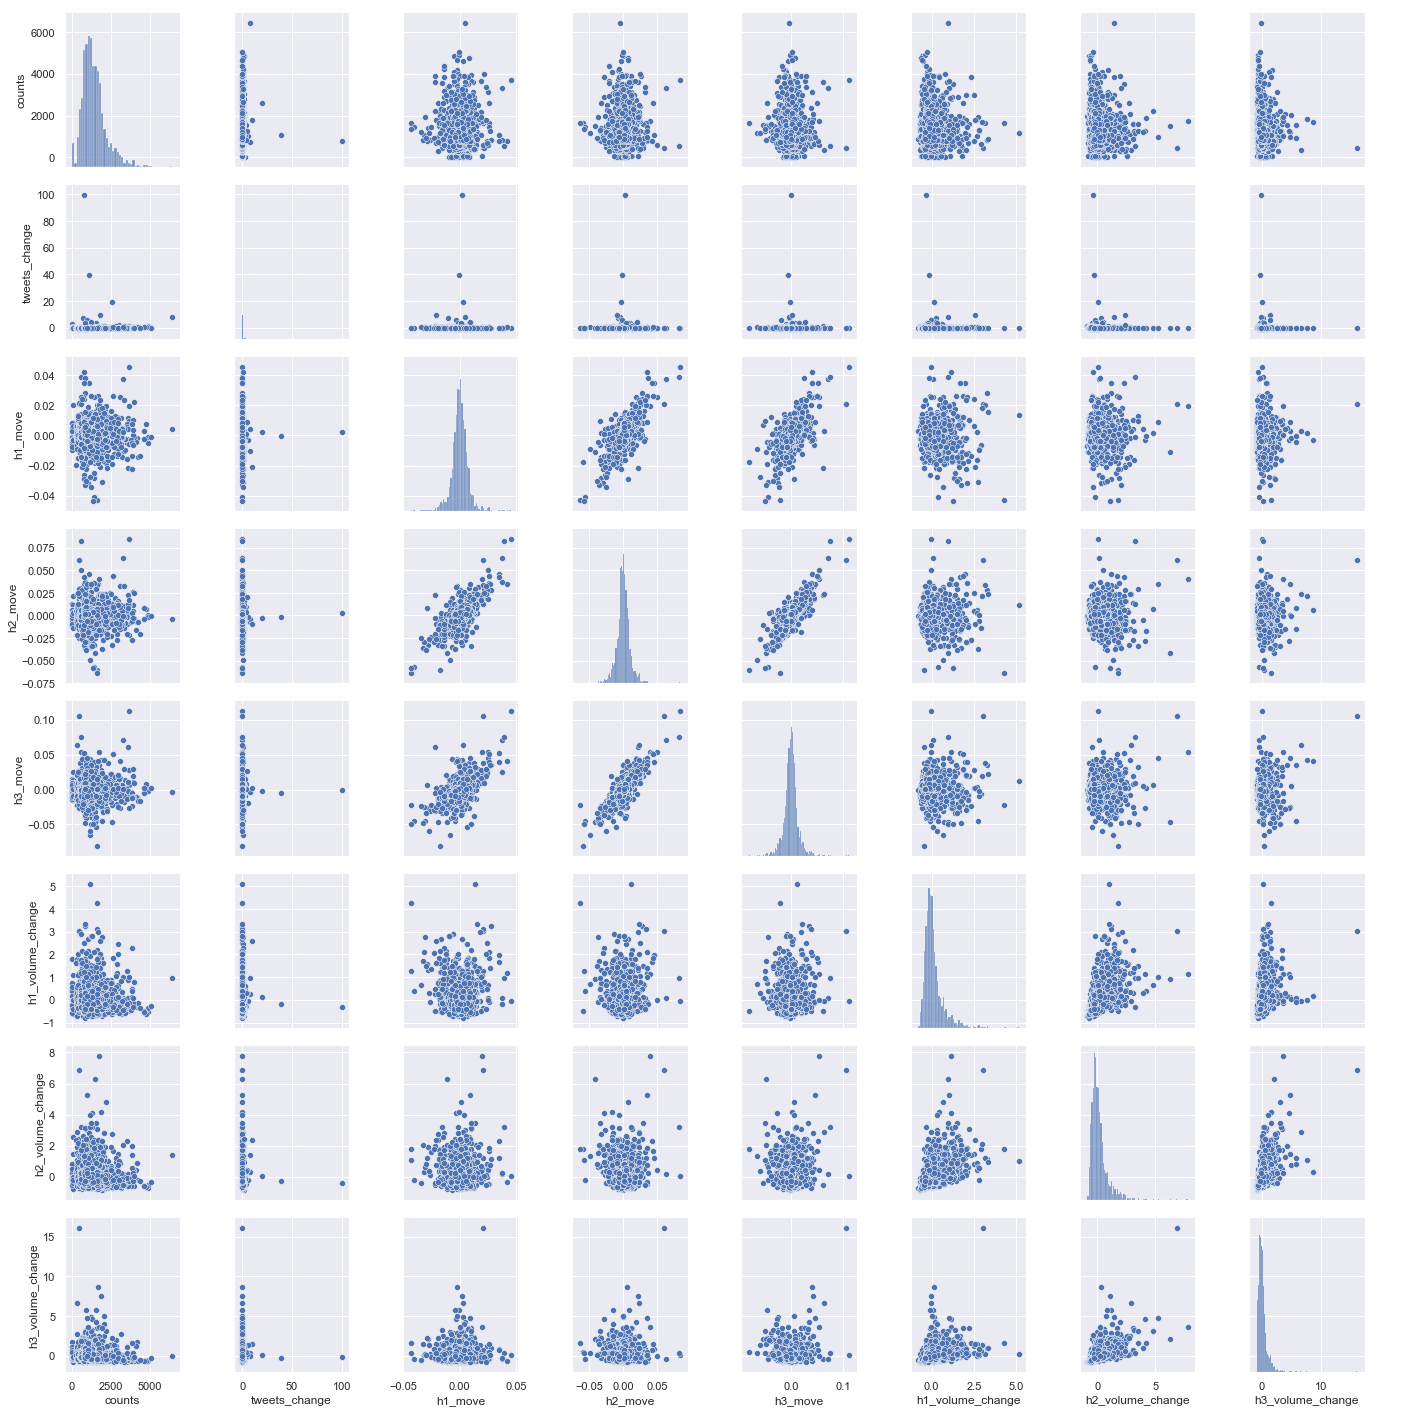

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(dfhourly,height=2.5)


# 1.4 Most Influential Users

In [58]:
dfuser= pd.merge(df_filter, df3,  how='left', left_on=['hour'], right_on = ['hour'])

In [59]:
bestworst=dfuser.groupby(['user_name'],as_index=False).agg({'h1_move': 'sum','h2_move':'sum','h3_move':'sum'})
best=bestworst.sort_values('h1_move',ascending=False)
best.reset_index(drop=True)

user_name   h1_move    h2_move    h3_move
0                                               Bitswings  8.677698   5.819485  10.093146
1                                      Whale Transactions  5.835702  10.382505  13.089298
2                                             Crunchyroll  4.634997   3.950360   0.473662
3                                             gongzige618  4.282630   6.168039   6.383287
4                                            CryptoSquawk  3.893946   8.206699  11.163785
5                                   #Help Me Pay My Bills  3.848455   9.049976  13.786003
6                                            BitcoinAgile  3.712609   7.884153  10.555386
7                                      DYOR.net Dev & Bot  3.647014   7.212537  10.972239
8                                          brettmurphynet  3.396798   6.473065  10.911721
9                                               Hamidreza  3.342121   3.722168   4.361679
10                                                Ram Raj  3.083526   3.881123   2.304556
11                                          Mehmet pekşen  3.080101   4.951790   2.833763
12                                              Tom Hanks  3.029128   1.942465  -1.458882
13                                                 Mohsen  2.888944   2.248656   2.331348
14                                           Crypto Elena  2.880632   4.445872   4.856854
15                                          The future...  2.789658   6.298929   8.840774
16                                                sai.bit  2.783571   2.280757  -0.511796
17                                                 Amin.m  2.765364  -0.166639  -2.027440
18                                            BEARWHALE 🐳  2.683082   4.094402   2.726516
19                                           ChinettePunk  2.682497   4.273230   5.261744
20                                                mehrzad  2.607052   3.401306   1.771338
21                                        Nurullah Keklik  2.587361   2.849177   2.511427
22                                          Crypto Volume  2.547425   4.424029   1.322120
23                                               Khophoza  2.397937   3.063465   3.762708
24                                             iraj.abadi  2.271051   1.871945   0.403114
25                                         Crypto Council  2.254319  -1.570748  -4.214311
26                                          imkaushal2603  2.223036   3.605131   2.711014
27                                        cecille manzano  2.184758   1.242224   0.764292
28                                             Heera Zane  2.173003   3.934061   3.588221
29                                   Мусалреза 1 шамаьади  2.120919   1.234003   2.557336
30                                        tictoknextblock  2.053967   4.247957   5.780317
31                                                   ELSA  2.052988   4.738918   4.951597
32                                                  ARIAN  2.041798  -0.426860   2.716134
33                                               Hoba Bot  2.030494   4.136947   6.539424
34                                              chanel.c/  1.991218   2.709340   2.495956
35                                             Kimmy Rein  1.966807   4.623072   3.451624
36                                            Amir Meshel  1.931885   2.461589   3.222922
37                                            Honour Rose  1.923660   0.102935   1.523516
38                                                     XO  1.875114   3.106214   3.917260
39                             Mohsen.au (feg is my life)  1.792984   1.922234   1.189409
40                                                milladi  1.738207   1.369080   1.740486
41                                           Free Bitcoin  1.734895   7.027747   9.166377
42                                          WhaleTrades 🐳  1.709652   3.818156   2.513971
43                                                  Mehdi  1.481928   1.277387   0.57198

In [60]:
worst=bestworst.sort_values('h1_move',ascending=True)
worst.reset_index(drop=True)

user_name   h1_move    h2_move    h3_move
0                                             ali barrera -7.284586  -9.071395  -7.992865
1                                         ExchangeWhales🐋 -6.952038 -12.878175 -23.452710
2                                                  Sophie -6.295206  -0.797153  -1.842840
3                                           Volume Alerts -5.636211 -12.354409 -17.420003
4                                     Bitcoin_Whale_Alert -5.488477  -6.308241  -7.522121
5                                                     MTN -4.990247 -14.586761 -17.215244
6                                                    Madi -4.913926  -6.397078  -8.333703
7                                            Crypto Jenny -4.871559 -12.588837 -14.816901
8                                            Whale Alerts -4.300943  -7.021638 -11.668585
9                       Cryptocurrency prices (real-time) -4.127950  -7.866543 -11.834097
10                                      Rhanyery BabyDOGE -3.957742  -3.773866  -5.533526
11                                                 yashar -3.744643   0.433183   1.518890
12                                            Koemata Nai -3.322297  -3.577785  -5.260765
13                                            Crypto king -3.103796  -6.124892 -10.324916
14                                               DYOR.net -2.950856  -5.836327  -8.898897
15                                      Now on Bitcoin 🇬🇧 -2.861608  -1.457708  -2.031344
16                                            Crypto Life -2.808726  -8.771367  -4.868759
17                                                     MK -2.761081  -4.379979  -6.141745
18                                          crypto nanomi -2.656076  -5.802720  -5.430359
19                                            cryptostar_ -2.649313  -4.083545  -5.855707
20             thinkmoon.io | Latest crypto trends & news -2.632804  -6.339491  -9.459353
21                                                COINRBI -2.577811  -4.058466  -5.956157
22                                         Crypto Bitlord -2.369614  -1.431082  -0.520229
23                              WSB CFO _ Dogecoinwizzard -2.348552  -4.072966  -4.177842
24                                           Crypto Vihat -2.226399  -2.654555  -1.637135
25                                   Bingo Crypto Scanner -2.145558  -0.756461  -0.910202
26                                                minis40 -2.093449  -4.250537  -6.514659
27                                      Everything crypto -2.035900  -3.991409  -5.966127
28                                                 ᵋߠΣᏚᏞ₳ -1.929655   0.229116   0.575611
29                                             coinmstsmo -1.764200  -2.608187  -3.168731
30                                          behrouz joon2 -1.752500  -1.316525   0.478595
31                                           Crypto Bittu -1.750886  -2.570206  -1.383566
32                                         Crypto Freakie -1.750078   0.126224  -0.984484
33                                   Dr. Crypto Analyst ⚡ -1.734166  -2.715641  -4.156145
34                                            abbas khoda -1.730081  -1.383609  -0.221364
35                                                Dani VB -1.638042  -1.075652  -1.874327
36                                Bitcoin Price Alert Bot -1.585649  -1.950647  -2.253402
37                     ClankApp - Crypto Whales Tracker 🐳 -1.579215  -4.310546  -5.457010
38                                              BlockScan -1.570323  -0.445235   2.290694
39                                         Onesmas Riungu -1.515705  -1.693933  -1.895631
40                                        #All Bills Paid -1.505909  -3.087502  -5.110985
41                                      GoldSilverBitcoin -1.500461  -2.256448  -1.535911
42                                         BitcoinTracker -1.495324  -3.175993  -4.099731
43                           South Africa Rants and Raves -1.491229  -1.031669  -0.82680

In [43]:
mtn=df_filter[df_filter['user_name']=='MTN']

In [44]:

alt.Chart(mtn).mark_bar().encode(
    alt.X("hour:N"),
    y='count()',
)

alt.Chart(...)

# Best User 'Whale Transactions' Analysis

In [ ]:
wt=dfuser[dfuser['user_name']=='Whale Transactions']

In [69]:
pd.set_option('display.max_colwidth', 100)

wt[['hour','text']]

hour                                                                                                 text
46778   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (801.00118432 BTC) TRANSACTION AT HASH a6b58c3d2d8d09af19ee288ea7d4...
46810   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (300.71722144 BTC) TRANSACTION AT HASH d06170173842dc7d890d5eb2d6c7...
46826   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (647.2784889 BTC) TRANSACTION AT HASH 764816064d1cbaf7736aa8586aca9...
46832   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (393.69025557 BTC) TRANSACTION AT HASH 635f25f89dfe664f3fb91b4bc090...
46847   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1253.58289534 BTC) TRANSACTION AT HASH f3b6ab3d00e8fd4331b113c43cf...
46857   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (554.93110637 BTC) TRANSACTION AT HASH 390473e45da4c749017b6c02bd8a...
46866   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (700.00056885 BTC) TRANSACTION AT HASH d6dcf74faee5e3aac4100c4ccf21...
46874   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (261.865985 BTC) TRANSACTION AT HASH 533ec2e40b05959d581ba683a8e0ed...
46877   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (815.22465347 BTC) TRANSACTION AT HASH 9f5f60427693a1091562ca1e910d...
46902   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (800.00592333 BTC) TRANSACTION AT HASH 03d6a272c68a454bd16c66107b11...
46909   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (353.94918529 BTC) TRANSACTION AT HASH 9e0a97853a4ae49aa442501d9f72...
46958   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (525.005 BTC) TRANSACTION AT HASH 2e39c48469e6984b9ed87931741accf27...
46988   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (445.63383293 BTC) TRANSACTION AT HASH 0a4349717b2eddfa8b86a66e47a2...
46992   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (645.63396251 BTC) TRANSACTION AT HASH 60918a269846122b110c278cadc8...
47059   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (3109.82991247 BTC) TRANSACTION AT HASH fb8a75bec74a42e73c0ebc26644...
47068   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (500 BTC) TRANSACTION AT HASH d86c878d8f292eddbea1228e8cc03fb9ad004...
47286   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (350.5740083 BTC) TRANSACTION AT HASH 6c59892a8fd53c32b876f744b2472...
47313   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (499.99985128 BTC) TRANSACTION AT HASH 398f2df08262898da2a3a0501e40...
47332   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (970.63422125 BTC) TRANSACTION AT HASH 0e98f57edac5e93b910f68cd4a6c...
47334   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1070.63435041 BTC) TRANSACTION AT HASH 3fbc0024517b85b74638f48489d...
47352   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1185.63447957 BTC) TRANSACTION AT HASH 39431a0fc01f50331a8c4285bf9...
47357   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1300.63460873 BTC) TRANSACTION AT HASH 33ed8f63e5100ad07f7617cd7d1...
47385   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1385.63473789 BTC) TRANSACTION AT HASH b59023f1943d2c71db4a792cb74...
47389   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (289.11992909 BTC) TRANSACTION AT HASH c2c70f34ce898c8c316cc71a9f78...
47390   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1465.65106193 BTC) TRANSACTION AT HASH edeaab61cb9563d312949be7739...
47481   2021-03-12 06:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (381.32301532 BTC) TRANSACTION AT HASH 249ae0a0c9a962cd4d3a62f5ab40...
47545   2021-03-12 06:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (2000.99953908 BTC) TRANSACTION AT HASH 2fd821a0b194fad22030d4b0f34...
47590   2021-03-12 05:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (388.4439583 BTC) TRANSACTION AT HASH 75d7cab73a933ed98b48d38db3934...
47779   2021-03-12 04:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1082.54266267 BTC) TRANSACTION AT HASH ebdf690cf9c1a0dfb069860d63e...
47927   2021-03-12 03:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (2300.99969272 BTC) TRANSACTION AT HASH 247baadc127bcb64a90f5a56a61...
48060   2021-03-12 02:00

In [71]:
wtmean=wt.groupby(['hour'],as_index=False).agg({'h1_move': 'mean','h2_move':'mean','h3_move':'mean'})
wtmean

hour   h1_move   h2_move   h3_move
0   2021-03-12 00:00:00 -0.008006 -0.006798 -0.004495
1   2021-03-12 01:00:00  0.001218  0.003539 -0.003631
2   2021-03-12 02:00:00  0.002319 -0.004843  0.003378
3   2021-03-12 03:00:00 -0.007145  0.001057 -0.000747
4   2021-03-12 04:00:00  0.008261  0.006444 -0.000446
5   2021-03-12 05:00:00 -0.001802 -0.008635 -0.011568
6   2021-03-12 06:00:00 -0.006846 -0.009784 -0.009130
7   2021-03-12 07:00:00 -0.002959 -0.002300  0.000795
8   2021-03-12 09:00:00  0.003103 -0.000717 -0.002717
9   2021-03-12 10:00:00 -0.003808 -0.005802 -0.018090
10  2021-04-05 11:00:00  0.003513  0.006176  0.024488
11  2021-04-05 12:00:00  0.002654  0.020902  0.018272
12  2021-04-05 13:00:00  0.018199  0.015577  0.014979
13  2021-04-05 14:00:00 -0.002575 -0.003163 -0.003652
14  2021-04-05 15:00:00 -0.000589 -0.001079 -0.002406
15  2021-04-05 16:00:00 -0.000490 -0.001818  0.000368
16  2021-04-05 17:00:00 -0.001328  0.000858 -0.003121
17  2021-04-05 18:00:00  0.002190 -0.001795 -0.003605
18  2021-04-05 19:00:00 -0.003976 -0.005782 -0.002170
19  2021-04-05 20:00:00 -0.001813  0.001813  0.006115
20  2021-04-05 21:00:00  0.003633  0.007943  0.011799
21  2021-04-05 22:00:00  0.004294  0.008136 -0.001311
22  2021-04-05 23:00:00  0.003826 -0.005581 -0.006506
23  2021-04-06 00:00:00 -0.009371 -0.010293 -0.012594
24  2021-04-06 01:00:00 -0.000931 -0.003254 -0.000086
25  2021-04-06 02:00:00 -0.002325  0.000845  0.002078
26  2021-04-06 03:00:00  0.003178  0.004413  0.004007
27  2021-04-06 04:00:00  0.001231  0.000827 -0.003714
28  2021-04-06 05:00:00 -0.000404 -0.004939 -0.006454
29  2021-04-06 06:00:00 -0.004536 -0.006053 -0.002685
30  2021-04-06 07:00:00 -0.001523  0.001860 -0.003612
31  2021-04-06 08:00:00  0.003388 -0.002092  0.000923
32  2021-04-06 09:00:00 -0.005462 -0.002457 -0.003640
33  2021-04-06 10:00:00  0.003021  0.001832  0.000845
34  2021-04-06 11:00:00 -0.001186 -0.002170 -0.010114
35  2021-04-06 12:00:00 -0.000986 -0.008938 -0.011174
36  2021-04-06 13:00:00 -0.007961 -0.010199 -0.005765
37  2021-04-07 04:00:00  0.011109  0.007180  0.003556
38  2021-04-07 06:00:00 -0.003599 -0.005348 -0.010212
39  2021-04-08 04:00:00 -0.000845  0.003619  0.001857
40  2021-04-08 05:00:00  0.004468  0.002704  0.000372
41  2021-04-08 06:00:00 -0.001755 -0.004078 -0.007873
42  2021-04-08 07:00:00 -0.002326 -0.006128 -0.005044
43  2021-04-09 00:00:00 -0.005546 -0.006833 -0.005420
44  2021-04-10 01:00:00  0.005273  0.013969  0.045547
45  2021-04-10 02:00:00  0.008650  0.040063  0.036279
46  2021-04-10 03:00:00  0.031143  0.027392  0.022747
47  2021-04-10 04:00:00 -0.003638 -0.008142 -0.009721
48  2021-04-10 05:00:00 -0.004521 -0.006105 -0.005210
49  2021-04-10 06:00:00 -0.001591 -0.000692  0.003234
50  2021-04-10 07:00:00  0.000901  0.004833  0.002953
51  2021-04-10 08:00:00  0.003929  0.002051  0.000678
52  2021-04-10 09:00:00 -0.001871 -0.003238 -0.011257
53  2021-04-10 10:00:00 -0.001370 -0.009403 -0.003184
54  2021-04-10 11:00:00 -0.008045 -0.001817 -0.002934
55  2021-04-10 12:00:00  0.006279  0.005152  0.002640
56  2021-04-10 13:00:00 -0.001120 -0.003616 -0.003322
57  2021-04-10 14:00:00 -0.002499 -0.002205 -0.004929
58  2021-04-10 16:00:00 -0.002730 -0.004065 -0.011576
59  2021-04-10 17:00:00 -0.001339 -0.008870 -0.024712
60  2021-04-10 18:00:00 -0.007541 -0.023404 -0.014311
61  2021-04-10 20:00:00  0.009311  0.007061  0.019685
62  2021-04-10 21:00:00 -0.002229  0.010279  0.016691
63  2021-04-10 22:00:00  0.012535  0.018962  0.026521
64  2021-04-10 23:00:00  0.006347  0.013812  0.012391
65  2021-04-11 11:00:00  0.000044 -0.006384 -0.002530
66  2021-04-11 13:00:00  0.003880  0.005138  0.003857
67  2021-04-11 15:00:00 -0.001275  0.003671  0.003681
68  2021-04-11 16:00:00  0.004952  0.004962  0.002285
69  2021-04-11 17:00:00  0.000010 -0.002654 -0.002616
70  2021-04-11 19:00:00  0.000038 -0.001588  0.006635
71  2021-04-11 21:00:00  0.008236  0.006571  0.003683
72  2021-04-11 22:00:00 -0.001651 -0.004516 -0.003932
73  2021-04-11 23:00:00

In [107]:
import numpy as np
condition1 = [(wtmean['h1_move'] > 0),(wtmean['h1_move'] <0)]
condition2 = [(wtmean['h2_move'] > 0),(wtmean['h2_move'] <0)]
condition3 = [(wtmean['h3_move'] > 0),(wtmean['h3_move'] <0)]

values = ['1', '-1']
wtmean['h1_updown'] = np.select(condition1, values)
wtmean['h2_updown'] = np.select(condition2, values)
wtmean['h3_updown'] = np.select(condition3, values)

wtmean

hour   h1_move   h2_move   h3_move h1_updown h2_updown h2=3_updown h3_updown
0   2021-03-12 00:00:00 -0.008006 -0.006798 -0.004495        -1        -1          -1        -1
1   2021-03-12 01:00:00  0.001218  0.003539 -0.003631         1         1          -1        -1
2   2021-03-12 02:00:00  0.002319 -0.004843  0.003378         1        -1           1         1
3   2021-03-12 03:00:00 -0.007145  0.001057 -0.000747        -1         1          -1        -1
4   2021-03-12 04:00:00  0.008261  0.006444 -0.000446         1         1          -1        -1
5   2021-03-12 05:00:00 -0.001802 -0.008635 -0.011568        -1        -1          -1        -1
6   2021-03-12 06:00:00 -0.006846 -0.009784 -0.009130        -1        -1          -1        -1
7   2021-03-12 07:00:00 -0.002959 -0.002300  0.000795        -1        -1           1         1
8   2021-03-12 09:00:00  0.003103 -0.000717 -0.002717         1        -1          -1        -1
9   2021-03-12 10:00:00 -0.003808 -0.005802 -0.018090        -1        -1          -1        -1
10  2021-04-05 11:00:00  0.003513  0.006176  0.024488         1         1           1         1
11  2021-04-05 12:00:00  0.002654  0.020902  0.018272         1         1           1         1
12  2021-04-05 13:00:00  0.018199  0.015577  0.014979         1         1           1         1
13  2021-04-05 14:00:00 -0.002575 -0.003163 -0.003652        -1        -1          -1        -1
14  2021-04-05 15:00:00 -0.000589 -0.001079 -0.002406        -1        -1          -1        -1
15  2021-04-05 16:00:00 -0.000490 -0.001818  0.000368        -1        -1           1         1
16  2021-04-05 17:00:00 -0.001328  0.000858 -0.003121        -1         1          -1        -1
17  2021-04-05 18:00:00  0.002190 -0.001795 -0.003605         1        -1          -1        -1
18  2021-04-05 19:00:00 -0.003976 -0.005782 -0.002170        -1        -1          -1        -1
19  2021-04-05 20:00:00 -0.001813  0.001813  0.006115        -1         1           1         1
20  2021-04-05 21:00:00  0.003633  0.007943  0.011799         1         1           1         1
21  2021-04-05 22:00:00  0.004294  0.008136 -0.001311         1         1          -1        -1
22  2021-04-05 23:00:00  0.003826 -0.005581 -0.006506         1        -1          -1        -1
23  2021-04-06 00:00:00 -0.009371 -0.010293 -0.012594        -1        -1          -1        -1
24  2021-04-06 01:00:00 -0.000931 -0.003254 -0.000086        -1        -1          -1        -1
25  2021-04-06 02:00:00 -0.002325  0.000845  0.002078        -1         1           1         1
26  2021-04-06 03:00:00  0.003178  0.004413  0.004007         1         1           1         1
27  2021-04-06 04:00:00  0.001231  0.000827 -0.003714         1         1          -1        -1
28  2021-04-06 05:00:00 -0.000404 -0.004939 -0.006454        -1        -1          -1        -1
29  2021-04-06 06:00:00 -0.004536 -0.006053 -0.002685        -1        -1          -1        -1
30  2021-04-06 07:00:00 -0.001523  0.001860 -0.003612        -1         1          -1        -1
31  2021-04-06 08:00:00  0.003388 -0.002092  0.000923         1        -1           1         1
32  2021-04-06 09:00:00 -0.005462 -0.002457 -0.003640        -1        -1          -1        -1
33  2021-04-06 10:00:00  0.003021  0.001832  0.000845         1         1           1         1
34  2021-04-06 11:00:00 -0.001186 -0.002170 -0.010114        -1        -1          -1        -1
35  2021-04-06 12:00:00 -0.000986 -0.008938 -0.011174        -1        -1          -1        -1
36  2021-04-06 13:00:00 -0.007961 -0.010199 -0.005765        -1        -1          -1        -1
37  2021-04-07 04:00:00  0.011109  0.007180  0.003556         1         1           1         1
38  2021-04-07 06:00:00 -0.003599 -0.005348 -0.010212        -1        -1          -1        -1
39  2021-04-08 04:00:00 -0.000845  0.003619  0.001857        -1         1           1         1
40  2021-04-08 05:00:00  0.004468  0.002704  0.000372         1         1          

In [104]:
wtmean.groupby(['h1_updown']).size().reset_index(name='counts')


h1_updown  counts
0        -1     322
1         0       2
2         1     360

In [105]:
wtmean.groupby(['h2_updown']).size().reset_index(name='counts')


h2_updown  counts
0        -1     307
1         0       2
2         1     375

In [108]:
wtmean.groupby(['h3_updown']).size().reset_index(name='counts')


h3_updown  counts
0        -1     312
1         0       2
2         1     370

In [109]:
wtmean['h1_move'].sum()

0.47299748911452844

In [110]:
wtmean['h2_move'].sum()

0.8272751685979076

In [111]:
wtmean['h3_move'].sum()

1.0589050066435646

In [84]:
wthourcount=wt.groupby(['hour']).size().reset_index(name='counts')


In [89]:
wthourcount['counts'].describe()

count    684.000000
mean       7.764620
std        8.683731
min        1.000000
25%        2.000000
50%        5.000000
75%       10.000000
max      113.000000
Name: counts, dtype: float64

In [99]:
alt.Chart(wthourcount).mark_bar().encode(
    alt.X("hour:N",title='hour',axis=alt.Axis(labels=False)),
    alt.Y('counts:Q',title='tweets hourly count'),
).properties(width=500).properties(
 title={"text":'"Whale Transactions" Tweets Distribution'}
).configure_title(fontSize=18,anchor='middle',fontWeight='bold',font='Helvetica',subtitleFontWeight='bold',
)

alt.Chart(...)

In [73]:
wtmean['h1_move'].describe()

count    682.000000
mean       0.000694
std        0.008289
min       -0.048451
25%       -0.003286
50%        0.000344
75%        0.004300
max        0.042046
Name: h1_move, dtype: float64

In [79]:
wtmean['h3_move'].sum()

1.0589050066435646

In [116]:

a=alt.Chart(wtmean).mark_bar().encode(
    alt.X("h1_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

b=alt.Chart(wtmean).mark_bar().encode(
    alt.X("h2_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

c=alt.Chart(wtmean).mark_bar().encode(
    alt.X("h2_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

(a|b|c).properties(
 title={"text":'Return Distribution'}
).configure_title(fontSize=18,anchor='middle',fontWeight='bold',font='Helvetica',subtitleFontWeight='bold',
)

alt.HConcatChart(...)

In [51]:
wt['text'].unique()

array(['🚨🐋 THERE WAS A LARGE BITCOIN (801.00118432 BTC) TRANSACTION AT HASH a6b58c3d2d8d09af19ee288ea7d4a5dcc79acc8c4e00aa7… https://t.co/HGAqtuwS5a',
       '🚨🐋 THERE WAS A LARGE BITCOIN (300.71722144 BTC) TRANSACTION AT HASH d06170173842dc7d890d5eb2d6c7220dea155ea1e639b5f… https://t.co/xOBNs8jeNj',
       '🚨🐋 THERE WAS A LARGE BITCOIN (647.2784889 BTC) TRANSACTION AT HASH 764816064d1cbaf7736aa8586aca9eb4f7e518fea0df2dab… https://t.co/NDISIYNdU9',
       ...,
       '🚨🐋 THERE WAS A LARGE BITCOIN (582.09701501 BTC) TRANSACTION AT HASH 92d5714d31654df8b265c318b646b1fdf432c5ce29de545d72ac4b4651e99dd4.🚨🐋  #BTC #BITCOIN #WHALEALERT #WATCHINWHALES',
       '🚨🐋 THERE WAS A LARGE BITCOIN (582.1362508 BTC) TRANSACTION AT HASH 359fb5af96567c3f186768e4132d1683810b3f8fe0b5481d5227207e40335cab.🚨🐋  #BTC #BITCOIN #WHALEALERT #WATCHINWHALES',
       '🚨🐋 THERE WAS A LARGE BITCOIN (579.91525529 BTC) TRANSACTION AT HASH 48d8457aef3e1fa306b9da0471d7124e55b509a910c73bca80d169b6db3d966f.🚨🐋  #BTC #BITCOIN #

In [ ]:
# Worst User Analysis

In [117]:
exwh=dfuser[dfuser['user_name']=='ExchangeWhales🐋']
exwh.head(20)

user_name user_location                                                                                     user_description         user_created  user_followers user_friends user_favourites user_verified               date_x                                                                                          text                              hashtags          source is_retweet        day                hour          unix               date_y    symbol      open      high      low     close  Volume BTC   Volume USDT  tradecount  h1_price  h2_price  h3_price  h1_volume  h2_volume  h3_volume   h1_move   h2_move   h3_move  h1_volume_change  h2_volume_change  h3_volume_change
1583196  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:37:00   🚀🚀🚀 $4,139,664 BTCUSDT LONGED @$62,188.88 💻 on #Binance (23:37:00 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169
1583197  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:37:00   🚀🚀🚀 $3,127,229 BTCUSDT LONGED @$62,200.00 💻 on #Binance (23:37:00 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169
1583207  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:34:44  🔻🔻🔻 $1,171,605 BTCUSDT SHORTED @$62,240.00 💻 on #Binance (23:34:44 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169
1583227  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:32:09     🚀🚀🚀 $1,003,900 BTCUSD LONGED @$62,229.7 💻 on #Binance (23:32:09 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169
1583228  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:32:08    🔻🔻🔻 $1,422,200 BTCUSD SHORTED @$62,223.9 💻 on #Binance (23:32:08 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71 

In [120]:
exwh[['hour','text','date_x']]

hour                                                                                          text               date_x
1583196 2021-10-29 23:00:00   🚀🚀🚀 $4,139,664 BTCUSDT LONGED @$62,188.88 💻 on #Binance (23:37:00 UTC) #BTC #cryptocurrency  2021-10-29 23:37:00
1583197 2021-10-29 23:00:00   🚀🚀🚀 $3,127,229 BTCUSDT LONGED @$62,200.00 💻 on #Binance (23:37:00 UTC) #BTC #cryptocurrency  2021-10-29 23:37:00
1583207 2021-10-29 23:00:00  🔻🔻🔻 $1,171,605 BTCUSDT SHORTED @$62,240.00 💻 on #Binance (23:34:44 UTC) #BTC #cryptocurrency  2021-10-29 23:34:44
1583227 2021-10-29 23:00:00     🚀🚀🚀 $1,003,900 BTCUSD LONGED @$62,229.7 💻 on #Binance (23:32:09 UTC) #BTC #cryptocurrency  2021-10-29 23:32:09
1583228 2021-10-29 23:00:00    🔻🔻🔻 $1,422,200 BTCUSD SHORTED @$62,223.9 💻 on #Binance (23:32:08 UTC) #BTC #cryptocurrency  2021-10-29 23:32:08
1583229 2021-10-29 23:00:00   🚀🚀🚀 $1,380,033 BTCUSDT LONGED @$62,188.88 💻 on #Binance (23:32:07 UTC) #BTC #cryptocurrency  2021-10-29 23:32:07
1583279 2021-10-29 23:00:00     🚀🚀🚀 $1,896,600 BTCUSD LONGED @$62,403.4 💻 on #Binance (23:24:41 UTC) #BTC #cryptocurrency  2021-10-29 23:24:41
1583285 2021-10-29 23:00:00    🔻🔻🔻 $1,088,000 BTCUSD SHORTED @$62,339.9 💻 on #Binance (23:23:47 UTC) #BTC #cryptocurrency  2021-10-29 23:23:47
1583286 2021-10-29 23:00:00    🔻🔻🔻 $1,341,500 BTCUSD SHORTED @$62,364.9 💻 on #Binance (23:23:23 UTC) #BTC #cryptocurrency  2021-10-29 23:23:23
1583288 2021-10-29 23:00:00   🚀🚀🚀 $1,314,046 BTCUSDT LONGED @$62,365.78 💻 on #Binance (23:23:21 UTC) #BTC #cryptocurrency  2021-10-29 23:23:21
1583348 2021-10-29 23:00:00     🚀🚀🚀 $1,564,600 BTCUSD LONGED @$62,306.6 💻 on #Binance (23:14:48 UTC) #BTC #cryptocurrency  2021-10-29 23:14:48
1583349 2021-10-29 23:00:00  🔻🔻🔻 $2,787,742 BTCUSDT SHORTED @$62,250.02 💻 on #Binance (23:14:46 UTC) #BTC #cryptocurrency  2021-10-29 23:14:46
1583353 2021-10-29 23:00:00  🔻🔻🔻 $2,735,066 BTCUSDT SHORTED @$62,261.06 💻 on #Binance (23:14:11 UTC) #BTC #cryptocurrency  2021-10-29 23:14:11
1583365 2021-10-29 23:00:00          🔻🔻🔻 $807,601 BTC-PERP SHORTED @$62,217 💻 on #FTX (23:11:16 UTC) #BTC #cryptocurrency  2021-10-29 23:11:16
1583373 2021-10-29 23:00:00     🚀🚀🚀 $1,053,700 BTCUSD LONGED @$62,302.6 💻 on #Binance (23:10:27 UTC) #BTC #cryptocurrency  2021-10-29 23:10:27
1583379 2021-10-29 23:00:00    🔻🔻🔻 $1,163,300 BTCUSD SHORTED @$62,281.1 💻 on #Binance (23:08:59 UTC) #BTC #cryptocurrency  2021-10-29 23:08:59
1583508 2021-10-29 22:00:00     🚀🚀🚀 $1,453,300 BTCUSD LONGED @$62,429.5 💻 on #Binance (22:53:00 UTC) #BTC #cryptocurrency  2021-10-29 22:53:00
1583597 2021-10-29 22:00:00    🔻🔻🔻 $1,104,700 BTCUSD SHORTED @$62,319.3 💻 on #Binance (22:38:40 UTC) #BTC #cryptocurrency  2021-10-29 22:38:40
1583608 2021-10-29 22:00:00     🚀🚀🚀 $1,212,500 BTCUSD LONGED @$62,317.3 💻 on #Binance (22:37:15 UTC) #BTC #cryptocurrency  2021-10-29 22:37:15
1583661 2021-10-29 22:00:00   🚀🚀🚀 $1,310,792 BTCUSDT LONGED @$62,300.00 💻 on #Binance (22:29:04 UTC) #BTC #cryptocurrency  2021-10-29 22:29:04
1583792 2021-10-29 22:00:00     🚀🚀🚀 $1,488,100 BTCUSD LONGED @$62,422.0 💻 on #Binance (22:10:10 UTC) #BTC #cryptocurrency  2021-10-29 22:10:10
1583815 2021-10-29 22:00:00     🚀🚀🚀 $1,112,500 BTCUSD LONGED @$62,448.0 💻 on #Binance (22:07:16 UTC) #BTC #cryptocurrency  2021-10-29 22:07:16
1583843 2021-10-29 22:00:00    🔻🔻🔻 $1,106,400 BTCUSD SHORTED @$62,343.6 💻 on #Binance (22:03:42 UTC) #BTC #cryptocurrency  2021-10-29 22:03:42
1583883 2021-10-29 22:00:00    🔻🔻🔻 $1,063,600 BTCUSD SHORTED @$62,414.1 💻 on #Binance (22:00:05 UTC) #BTC #cryptocurrency  2021-10-29 22:00:05
1583935 2021-10-29 21:00:00     🚀🚀🚀 $1,090,200 BTCUSD LONGED @$62,499.4 💻 on #Binance (21:54:26 UTC) #BTC #cryptocurrency  2021-10-29 21:54:26
1584008 2021-10-29 21:00:00   🚀🚀🚀 $1,185,206 BTCUSDT LONGED @$62,501.00 💻 on #Binance (21:45:00 UTC) #BTC #cryptocurrency  2021-10-29 21:45:00
1584009 2021-10-29 21:00:00        🔻🔻🔻 $1,014,049 BTC-PERP SHORTED @$62,453 💻 on #FTX (21:45:00 UTC) #BTC #cryptocurrency  2021-10-29 21:45:00
1584023 2021-10-29 